# Results of Simulations

In this notebook we are going to detail how the simulations were designed and some results.

## Data Generation

The data generation process began obtaining a raw image and processing it pixel-wise. Then, generating the experiment events and the design matrix with them. With this and the image processed, the voxel-wise BOLD data without noise was obtained. And finally, a procedure to generate noise to the voxel-wise BOLD data is proposed.

All the procedures explained in this section are done by the `generateSimulationData.py` Script.

### Pixel-Wise Processing of Raw Image

The raw activation image was taken from <https://en.m.wikipedia.org/wiki/File:Soccerball.svg> is the $200px \times 200 px$ football drawing shown below:

![ball](./Data/Simulations/ball.png)

The white pixels were treated as $0$ and the black pixels as $1$, see it below.

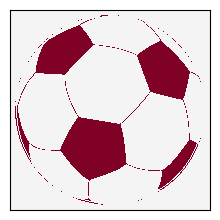

In [2]:
import numpy as np
import fMRIUtils as fmriu
b = np.load('Data/Simulations/Run032724/2D/ball_200.npy')
fmriu.plot2DImage(b.reshape(200,-1),True,'Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/aMap2D.png')

In [3]:
sum(b), sum(b)/40000

(7975, 0.199375)

From the $40,000$ pixels the image has, exactly $7975$ are black, hence we will have an approximate of $19.9 \%$ of activation, which is higher than usual fMRI images.

### Other True Map Considered

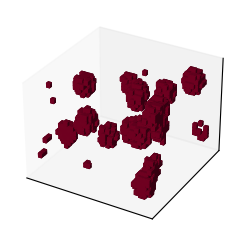

In [4]:
import numpy as np
import fMRIUtils as fmriu
c = np.load('Data/Simulations/Run032724/3D/image_40x40x25_1.npy')
fmriu.plot3DImage(c,True,'Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/aMap3D.png')

In [5]:
sum(c.flatten()), sum(c.flatten())/40000

(1581.0, 0.039525)

From the $40,000$ voxels the image has, exactly $1581$ are active, hence we will have an approximate of $3.85 \%$ of activation, which is usual in fMRI experiments.

### Experiment Events and Design Matrix

The simulated experiment has 100 scans with 2 seconds between them, for a total of 200 seconds. There are 4 stimulus that last for 10 seconds. The first one occurs randomly within the first 10 to 24 seconds, and the following stimulus occur also randomly with a time difference of 36 to 50 seconds from the previous stimulus. Note that in the worst case scenario, the last stimulus will begin at 174 seconds and will end at 184 seconds. See it below.

<Axes: label='conditions', ylabel='scan number'>

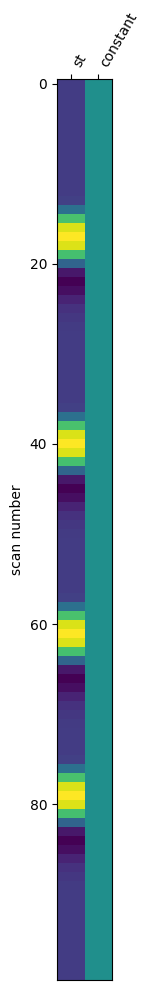

In [6]:
from nilearn.plotting import plot_design_matrix
import pandas as pd

X = pd.read_csv('Data/Simulations/Run032724/2D/X.csv')
plot_design_matrix(X)

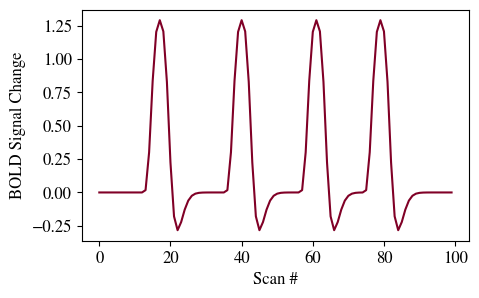

In [7]:
import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.figure(figsize=(5,3))
X['st'].plot(color='#800026')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Scan #', fontsize=12)
plt.ylabel('BOLD Signal Change', fontsize=12)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/gloverHRF.png', transparent=True, bbox_inches = 'tight',dpi=1000)

### Voxel-Wise BOLD Data without Noise

The BOLD data was generated by taking the product of the design matrix of dimension $(100,2)$ and $\beta$ vectors of dimension $(2,1)$, where the first element of the vector takes a value of $75$ when the voxel is activated and a value of $0$ when is not. Additionally, the second element of the $\beta$ vector (corresponding to the intercept) is always $100$. This was done for each of the $40000$ voxels. See the BOLD data map below.

In [9]:
import pandas as pd
BOLD = pd.read_csv('Data/Simulations/Run032724/2D/BOLD.csv')
BOLD

0      1      2      3      4      5      6      7      8      9  ...  \
0   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
1   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
2   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
3   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
4   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
96  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
97  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
98  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   
99  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  ...   

    39990  39991  39992  39993  39994  39995  39996  39997  39998  39999  
0   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
1   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
2   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
3   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
4   100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
95  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
96  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
97  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
98  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  
99  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  

[100 rows x 40000 columns]

### Generate Noise in BOLD Data

To generate noise in the BOLD data, the `generateSignal()` function was used. This function uses an ARIMA Model to simulate the noise. The noise has a mean value of $0$, a variance of $3$. The values of $P$ and $Q$ were iterated $50$ times from $0$ to $3$ each. This was done for each of the $40000$ voxels. In general, each BOLD data with noise is saved as: `BOLD_PxQyRz.csv` with $x,y \in [0,3]$ and $z \in [1,50]$. See an example below.

In [10]:
BOLD_P0Q0R1 = pd.read_csv('Data/Simulations/Run032724/2D/BOLD_P0Q0R1.csv')
BOLD_P0Q0R1

0           1           2           3           4           5  \
0    67.477520  107.957972  131.750524  102.671795  112.380212   65.427611   
1    48.747055   97.723301   70.657242  114.256110  137.239808  102.015041   
2   124.976480  100.134295   99.999750  111.971207  123.982273  109.937658   
3    82.893435  131.504883  160.948156  115.347162   90.215721   73.189871   
4   120.494562   83.059304  118.486536  123.819154   60.798496   36.780602   
..         ...         ...         ...         ...         ...         ...   
95  102.835267  110.768272  121.321746   89.938216   48.381671  120.266166   
96  119.108538  102.986484  106.546764   92.298683   90.192892   94.193271   
97   83.898649   99.798897   97.674646  111.855143   99.389792  135.137021   
98  148.201688  136.079230   78.176338  177.480244   96.293162  119.631088   
99  136.878355   70.338717  125.725672  101.970947   96.022388   96.048572   

             6           7           8           9  ...       39990  \
0    89.239562  114.244624  106.426458  103.965439  ...  106.506982   
1    83.368956  132.949902   87.057339   96.549916  ...   58.470908   
2    92.824464  119.334516   69.560899   91.041578  ...  134.739073   
3    93.552792  115.759451  119.266432   97.352210  ...   68.077836   
4   149.113869   87.425653   63.536500   50.270712  ...  147.553067   
..         ...         ...         ...         ...  ...         ...   
95   71.810188  118.798187  109.052051  114.940929  ...  116.052545   
96  106.482909   81.346431   86.874848  104.788669  ...  109.476724   
97  100.384767  119.193985   94.668954  136.957634  ...   89.401463   
98   98.637041  130.157449  102.900708   56.745908  ...   86.384995   
99   86.052264   85.010326   83.572663  103.805688  ...   90.888224   

         39991       39992       39993       39994       39995       39996  \
0   127.752011  121.594875  107.574390  114.740847  105.213606   96.794548   
1   102.032382  121.467854   95.155242   72.550348   86.582045  146.144484   
2   109.422726   94.838388  117.478366  109.545870   60.499360  138.743629   
3   115.838485  130.222956  103.418849  109.086682   76.878938   83.705367   
4   171.537992   83.245119  116.953219   98.893103   99.326557   64.750363   
..         ...         ...         ...         ...         ...         ...   
95   90.211495  109.540764   77.738416  101.550882  145.016055  103.011758   
96   97.750728   92.944845   75.549511  127.461315   89.718065   79.055852   
97   71.642636   85.738778  130.143692   95.168153   78.107154   83.235479   
98   89.433969  120.244402   66.733770   91.397571   89.334842  110.965340   
99   97.515781  123.858062   72.985401   83.798201   79.150856  126.314708   

         39997       39998       39999  
0    62.695417  104.885620   97.157141  
1   100.917927  112.565252   73.670007  
2    77.918701   77.167139   73.325849  
3    78.754332  110.313425   72.019472  
4    79.414082   81.560175  134.195837  
..         ...         ...         ...  
95  112.027641  110.534088  139.275523  
96   87.523204   88.016713   77.485738  
97  100.642611  116.148882   85.551007  
98   97.096566  107.232609  128.695033  
99  107.025465  135.341140  113.744300  

[100 rows x 40000 columns]

#### Comparison of Signal With and Without Noise in Inactive Voxel 5045

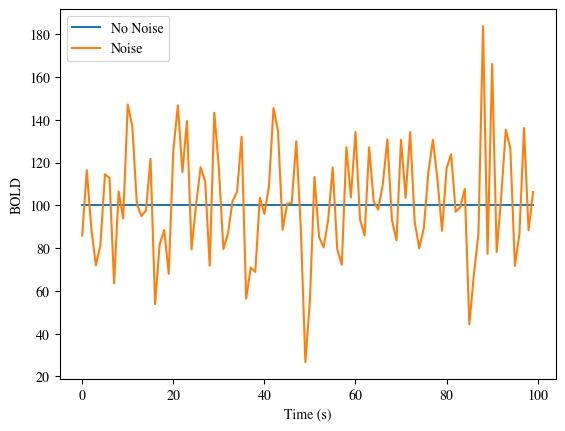

In [9]:
import matplotlib.pyplot as plt
BOLD['5045'].plot()
BOLD_P0Q0R1['5045'].plot()
plt.legend(['No Noise','Noise'])
plt.ylabel('BOLD')
plt.xlabel('Time (s)')
plt.show()

#### Comparison of Signal With and Without Noise in Active Voxel 5046

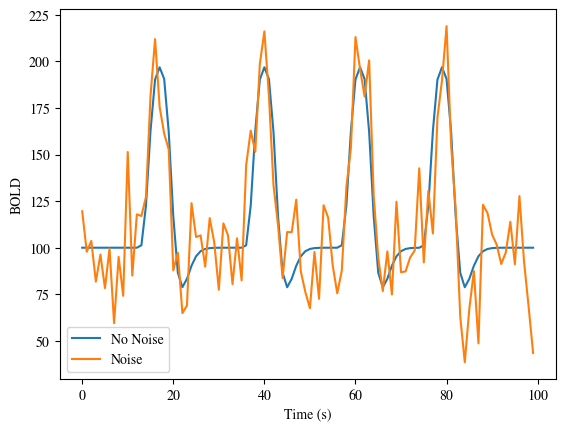

In [10]:
import matplotlib.pyplot as plt
BOLD['5046'].plot()
BOLD_P0Q0R1['5046'].plot()
plt.legend(['No Noise','Noise'])
plt.ylabel('BOLD')
plt.xlabel('Time (s)')
plt.show()

#### SNR of the BOLD Data

Note that when $P,Q = 0$, the SNR has a high value in active voxels and they differentiate from inactive voxels.

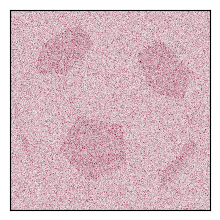

In [11]:
SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P0Q0R1[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plot2DImage(SNR_IM.reshape(200,-1),0)

Note that when $P,Q = 3$, its difficult to differentiate from active and inactive voxels.

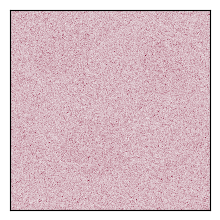

In [12]:
BOLD_P3Q3R1 = pd.read_csv('Data/Simulations/Run032724/2D/BOLD_P3Q3R1.csv')

SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P3Q3R1[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plot2DImage(SNR_IM.reshape(200,-1),0)

#### CNR of the BOLD Data

Note that when $P,Q = 0$, the CNR has a very high value in active voxels and they differentiate easily from inactive voxels.

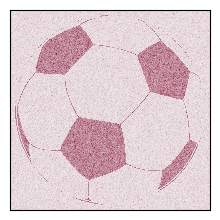

In [13]:
CNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P0Q0R1[c].values
    CNR_IM.append(fmriu.CNR(s2,s1))
CNR_IM = np.array(CNR_IM)

fmriu.plot2DImage(CNR_IM.reshape(200,-1),0)

Note that when $P,Q = 3$, the CNR has a slightly high value in active voxels but is harder to differentiate active voxels from inactive voxels.

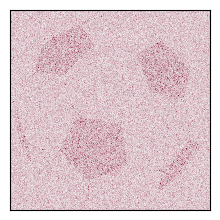

In [14]:
BOLD_P3Q3R1 = pd.read_csv('Data/Simulations/Run032724/2D/BOLD_P3Q3R1.csv')

CNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P3Q3R1[c].values
    CNR_IM.append(fmriu.CNR(s2,s1))
CNR_IM = np.array(CNR_IM)

fmriu.plot2DImage(CNR_IM.reshape(200,-1),0)

#### Numerical Distribution of Voxel-Wise SNR and CNR Values

In [15]:
Ds = []
Ps = []
Qs =[]
Rs = []
Vs = []
Values = []
Labels = []

for D in ['2D','3D']:
    fn = 'Data/Simulations/Run032724/' + D + '/BOLD.csv'
    BOLD = pd.read_csv(fn)
    for P in range(4):
        for Q in range(4):
            for R in range(1):
                fn = 'Data/Simulations/Run032724/' + D + '/BOLD_P' + str(P) + 'Q' + str(Q) + 'R' + str(R+1) + '.csv'
                BOLD_PxQyR1 = pd.read_csv(fn)

                for c in BOLD.columns:
                    s1 = BOLD[c].values
                    s2 = BOLD_PxQyR1[c].values

                    Ds.append(D)
                    Ps.append(P)
                    Qs.append(Q)
                    Rs.append(R+1)
                    Vs.append(int(c)+1)
                    Values.append(fmriu.SNR(s2,s1))
                    Labels.append('SNR')

                    Ds.append(D)
                    Ps.append(P)
                    Qs.append(Q)
                    Rs.append(R+1)
                    Vs.append(int(c)+1)
                    Values.append(fmriu.CNR(s2,s1))
                    Labels.append('CNR')

dfSNRCNR = pd.DataFrame({'Map':Ds,'P':Ps,'Q':Qs,'R':Rs,'V':Vs,'Values':Values,'Labels':Labels})
dfSNRCNR

Map  P  Q  R      V    Values Labels
0        2D  0  0  1      1  3.949005    SNR
1        2D  0  0  1      1  2.531281    CNR
2        2D  0  0  1      2  3.816361    SNR
3        2D  0  0  1      2  2.492313    CNR
4        2D  0  0  1      3  4.582832    SNR
...      .. .. .. ..    ...       ...    ...
2559995  3D  3  3  1  39998  1.724719    CNR
2559996  3D  3  3  1  39999  1.266379    SNR
2559997  3D  3  3  1  39999  1.324077    CNR
2559998  3D  3  3  1  40000  0.419721    SNR
2559999  3D  3  3  1  40000  1.883751    CNR

[2560000 rows x 7 columns]

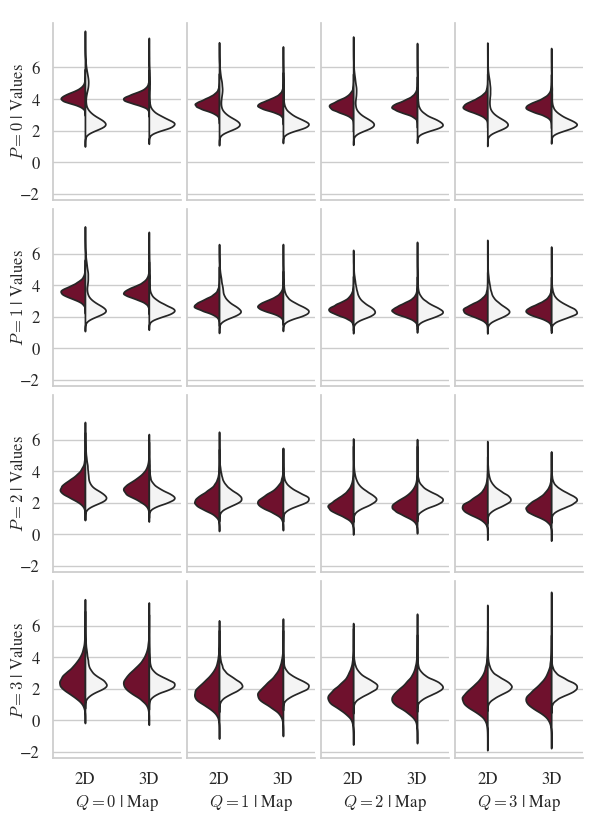

In [17]:
import seaborn as sns

sns.set(font='STIXGeneral',style="whitegrid")
g = sns.catplot(x='Map',y='Values',hue='Labels',row='P',col='Q',data=dfSNRCNR,kind='violin',palette=['#7f0126','#f4f4f4'],inner=None,split=True,height=2.1,aspect=1.55/2.1,legend=False)
g.set(yticks=[-2,0,2,4,6])
g.tick_params(labelsize=12)
g.set_xlabels(size=12)
g.set_ylabels(size=12)
g.set_titles(size=12)

handles, labels = g.axes[0,0].get_legend_handles_labels()
g.figure.legend(handles, labels, ncol=2, bbox_to_anchor=(0.7, 0.98), frameon=False,prop={'size': 12})

for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        row, col = axes_col.get_title().split('|')

        if i == 3:
            xlabel = axes_col.get_xlabel()
            axes_col.set_xlabel("$" + col.strip() + "$" + ' | ' + xlabel)

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel("$" + row.strip() + "$" + ' | ' + ylabel)
            axes_col.yaxis.labelpad = -5

        axes_col.set_title('')

g.figure.subplots_adjust(wspace=.05, hspace=.05)

g.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/cnrsnr.png', transparent=True, bbox_inches = 'tight',dpi=600)

#### Spatial Distribution of Voxel-Wise SNR and CNR Values

##### Defining New Colormap

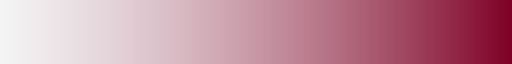

In [13]:
import matplotlib as mpl

ci = np.array([235,235,235,128])/256
cf = np.array([128,0,38,255])/256

cmap = np.ones((192,4))
for i in range(4):
    cmap[:,i] = np.linspace(ci[i],cf[i],192)

cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])
cmap

##### 2D Map

In [33]:
SNRims = []
CNRims = []
BOLD = pd.read_csv('Data/Simulations/Run032724/2D/BOLD.csv')
for P in range(4):
    for Q in range(4):
        fn = 'Data/Simulations/Run032724/2D/BOLD_P' + str(P) + 'Q' +str(Q)+ 'R1.csv'
        BOLD_PxQyR1 = pd.read_csv(fn)
        
        SNR_IM = []
        CNR_IM = []
        for c in BOLD.columns:
            s1 = BOLD[c].values
            s2 = BOLD_PxQyR1[c].values
            SNR_IM.append(fmriu.SNR(s2,s1))
            CNR_IM.append(fmriu.CNR(s2,s1))
        
        SNRims.append(np.array(SNR_IM).reshape(200,-1))
        CNRims.append(np.array(CNR_IM).reshape(200,-1))

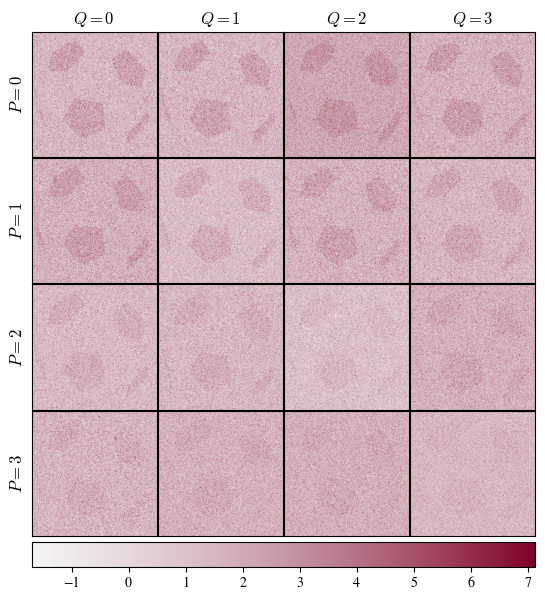

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(6.5, 8))
grid = ImageGrid(fig,111,nrows_ncols=(4,4),axes_pad=0.01,cbar_location='bottom',cbar_mode='single',cbar_pad='1%')

for i, ax in enumerate(grid):
    im = ax.imshow(SNRims[i],cmap=cmap)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    if i%4 == 0:
        lab = "$P = " + str(i//4) + "$"
        ax.set_ylabel(lab,size=12)

    if i//4 == 0:
        lab = "$Q = " + str(i%4) + "$"
        ax.set_title(lab,size=12)

grid[1].cax.colorbar(im)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/snr2D_Spatial.png', transparent=True, bbox_inches = 'tight',dpi=1000)


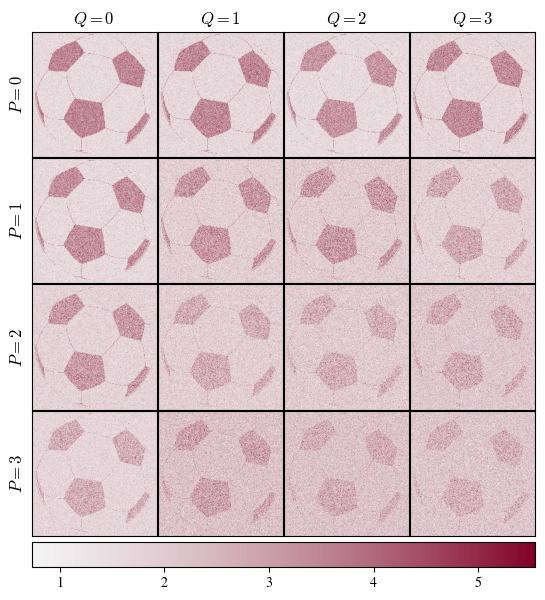

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(6.5, 8))
grid = ImageGrid(fig,111,nrows_ncols=(4,4),axes_pad=0.01,cbar_location='bottom',cbar_mode='single',cbar_pad='1%')

for i, ax in enumerate(grid):
    im = ax.imshow(CNRims[i],cmap=cmap)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    if i%4 == 0:
        lab = "$P = " + str(i//4) + "$" 
        ax.set_ylabel(lab,size=12)
    if i//4 == 0:
        lab = "$Q = " + str(i%4) + "$"
        ax.set_title(lab,size=12)

grid[1].cax.colorbar(im)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/cnr2D_Spatial.png', transparent=True, bbox_inches = 'tight',dpi=1000)


## Bayesian Model

The Bayesian Model takes the BOLD data with noise of each run and the design matrix in order to estimate the values of the $\beta$ vectors a $1000$ times. Then, a frequency probability is calculated to obtain the probability of having the first element of the vector greather than $0$. All this process is done for each voxel, obtaining then a probability map that can be interpreted as the probability of having the voxels activated. See an example below.

All the procedures explained in this section are done by the `bayesianModel.py` Script.

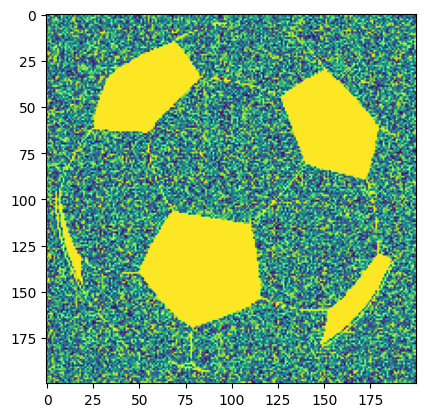

In [43]:
stProb_P0Q0 = pd.read_csv('Data/Simulations/Simulations/pMaps_P0Q0.csv')
r1_stProb_P0Q0 = stProb_P0Q0.loc[0,:].values

fmriu.plotImage(r1_stProb_P0Q0,200,0)

## Threesholding and Smoothing

The threesholding and smoothing algorithm takes the probability map obtained in each run and at the same time eliminates the noise of the map and generates a threeshold probability that indicates whether each voxel is truly activated or not. The algorithm uses the Jaccard index of the generated images to terminate. The results are stored in four files for each run, these are:

- `Zeta_PxQyRz.npy`: Contains the activation map in each iteration
- `eta_PxQyRz.npy`: Contains the threeshold value in each iteration
- `N_PxQyRz.npy`: Contains the number of inactive voxels in each iteration
- `X_PxQyRz.npy`: Contains the probability maps in each iteration

See an example of the results below.

All the procedures explained in this section are done by the `th_sm.py` Script.

### Last activation map

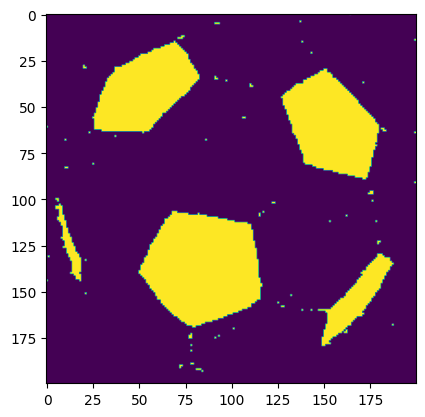

In [49]:
Zeta_P0Q0R1 = np.load('Data/Simulations/Simulations/Zeta_P0Q0R1.npy')
fmriu.plotImage(Zeta_P0Q0R1[9],200,0)

In [43]:
X_P0Q0R1[3].mean(),X_P0Q0R1[3].std()

(0.5928304000000002, 0.1813249343361305)

### Threeshold values

In [45]:
eta_P0Q0R1 = np.load('Data/Simulations/Simulations/eta_P0Q0R1.npy')
eta_P0Q0R1

array([0.79949168, 0.78254099, 0.77462376, 0.77061095, 0.76754061,
       0.76469801, 0.76182766, 0.75881487, 0.75560064])

### Number of inactive voxels in each iteration

In [38]:
N_P0Q0R1 = np.load('Data/Simulations/N_P0Q0R1.npy')
N_P0Q0R1

array([2500, 1896, 1896, 1893])

### Last Probability Map

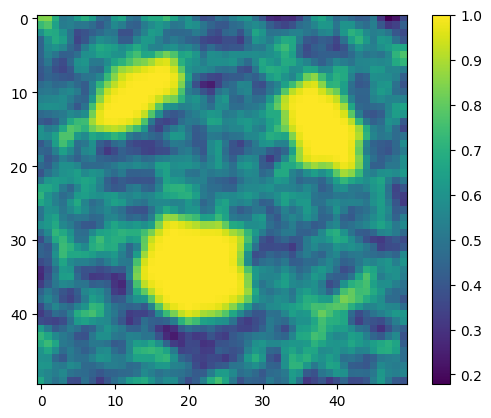

In [39]:
X_P0Q0R1 = np.load('Data/Simulations/X_P0Q0R1.npy')
fmriu.plotImage(X_P0Q0R1[3],50)

## Other Results

The Jaccard Index between the original image and the final probability map can be easily calculated

In [50]:
import fMRIUtils as fmriu
fmriu.jaccardIndex(Zeta_P0Q0R1[9],b)

0.9241607449154619

## BFAST Example

### 2D Example

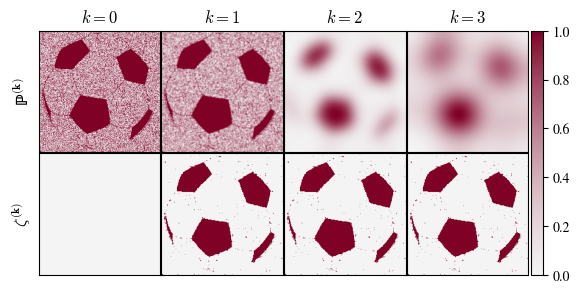

In [19]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Xs = np.load('Data/Simulations/Run032724/2D/X_P0Q0R1.npy')
Zetas = np.load('Data/Simulations/Run032724/2D/Zeta_P0Q0R1.npy')

fig = plt.figure(figsize=(6.5,8))
grid = ImageGrid(fig,111,nrows_ncols=(2,4),axes_pad=0.01,cbar_location='right',cbar_mode='single',cbar_pad='1%')

for i, ax in enumerate(grid):
    if i < 4:
        im = ax.imshow(Xs[i].reshape(200,200),cmap=cmap)
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        lab = "$k="+str(i)+"$"
        ax.set_title(lab,size=12)
        if i == 0:
            lab = r"$\mathbf{\mathbb{P}^{(k)}}$"
            ax.set_ylabel(lab,size=12)
    else:
        im = ax.imshow(Zetas[i-4].reshape(200,200),cmap=cmap)
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        if i-4 == 0:
            lab = r"$\mathbf{\zeta^{(k)}}$"
            ax.set_ylabel(lab,size=12)
    
grid[1].cax.colorbar(im)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/bfastEx2D.png', transparent=True, bbox_inches = 'tight',dpi=1000)

### 3D Example

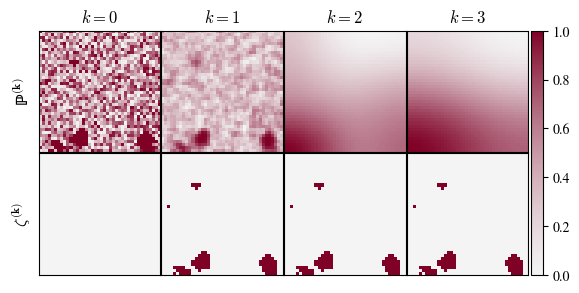

In [31]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

Xs = np.load('Data/Simulations/Run032724/3D/X_P0Q0R1.npy')
Zetas = np.load('Data/Simulations/Run032724/3D/Zeta_P0Q0R1.npy')

fig = plt.figure(figsize=(6.5,8))
grid = ImageGrid(fig,111,nrows_ncols=(2,4),axes_pad=0.01,cbar_location='right',cbar_mode='single',cbar_pad='1%')

for i, ax in enumerate(grid):
    if i < 4:
        im = ax.imshow((Xs[i].reshape(40,40,25))[:,:,20],cmap=cmap)
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        lab = "$k="+str(i)+"$"
        ax.set_title(lab,size=12)
        if i == 0:
            lab = r"$\mathbf{\mathbb{P}^{(k)}}$"
            ax.set_ylabel(lab,size=12)
    else:
        im = ax.imshow((Zetas[i-4].reshape(40,40,25))[:,:,20],cmap=cmap)
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        if i-4 == 0:
            lab = r"$\mathbf{\zeta^{(k)}}$"
            ax.set_ylabel(lab,size=12)
    
grid[1].cax.colorbar(im)
plt.savefig('Thesis_MS_ScientificComputing_FlorezCoronel_JuanE/images/bfastEx3D.png', transparent=True, bbox_inches = 'tight',dpi=1000)

### Real Example

## Performance Metrics

### 2D

In [65]:
import pandas as pd
from sklearn.metrics import confusion_matrix

path = 'Data/Simulations/Run032724/2D/'

fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)

fn_ball = path + 'ball_200.npy'
ball_200 = np.load(fn_ball)

P,Q = [],[]
SNRm,CNRm,Ji = [],[],[]
SNRmd,CNRmd = [],[]
FPR = []
POAE = []

for p in range(4):
    for q in range(4):
        for r in range(1):
            P.append(p)
            Q.append(q)
            
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            
            cm = confusion_matrix(ball_200,zeta[k])
            fp = cm[0,1]
            tn = cm[0,0]
            FPR.append(fp/(fp+tn))

            tpoa = sum(ball_200)/len(ball_200)*100
            ppoa = sum(zeta[k])/len(zeta[k])*100

            POAE.append(ppoa-tpoa)

            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNRm.append(np.mean(SNRs))
            CNRm.append(np.mean(CNRs))
            SNRmd.append(np.median(SNRs))
            CNRmd.append(np.median(CNRs))
df = pd.DataFrame({'P':P,'Q':Q,'SNRm':SNRm,'CNRm':CNRm,'SNRmd':SNRmd,'CNRmd':CNRmd,'JI':Ji,'FPR':FPR,'A% Error':POAE})
df

P  Q      SNRm      CNRm     SNRmd     CNRmd        JI       FPR  A% Error
0   0  0  4.084135  3.034424  4.064115  2.600278  0.925602  0.007838   -0.2750
1   0  1  3.681459  2.934172  3.662635  2.583106  0.892515  0.017955    0.5775
2   0  2  3.578771  2.903522  3.559518  2.574799  0.875417  0.022670    0.9200
3   0  3  3.568759  2.895983  3.544809  2.569026  0.869491  0.024450    1.0575
4   1  0  3.598778  2.904160  3.580605  2.573301  0.879447  0.022170    0.9325
5   1  1  2.753756  2.699307  2.727404  2.518210  0.850890  0.029914    1.4600
6   1  2  2.515887  2.619093  2.487956  2.472502  0.848772  0.030757    1.5375
7   1  3  2.469141  2.600729  2.444244  2.464968  0.853327  0.029227    1.4125
8   2  0  2.956445  2.705012  2.916026  2.491741  0.868481  0.024012    0.9700
9   2  1  2.168625  2.476146  2.127160  2.381518  0.864779  0.026698    1.2900
10  2  2  1.875302  2.386070  1.828397  2.314755  0.857754  0.028447    1.3950
11  2  3  1.804996  2.364551  1.763355  2.299603  0.858108  0.028259    1.3750
12  3  0  2.579440  2.560720  2.510537  2.410495  0.893226  0.017393    0.5075
13  3  1  1.841555  2.341965  1.777551  2.279097  0.888202  0.018548    0.5750
14  3  2  1.589514  2.257566  1.527117  2.213439  0.883705  0.020016    0.7000
15  3  3  1.525964  2.232270  1.457459  2.192531  0.879302  0.021327    0.8025

In [66]:
df.to_csv('performanceMetrics2D.csv',index=False)

### 3D

In [62]:
import pandas as pd
from sklearn.metrics import confusion_matrix

path = 'Data/Simulations/Run032724/3D/'

fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)

fn_ball = path + 'image_40x40x25_1.npy'
ball_200 = np.load(fn_ball)

P,Q = [],[]
SNRm,CNRm,Ji = [],[],[]
SNRmd,CNRmd = [],[]
FPR = []
POAE = []

for p in range(4):
    for q in range(4):
        for r in range(1):
            P.append(p)
            Q.append(q)
            
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200.flatten()))
            
            cm = confusion_matrix(ball_200.flatten(),zeta[k])
            fp = cm[0,1]
            tn = cm[0,0]
            FPR.append(fp/(fp+tn))

            tpoa = sum(ball_200.flatten())/len(ball_200.flatten())*100
            ppoa = sum(zeta[k])/len(zeta[k])*100

            POAE.append(ppoa-tpoa)

            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNRm.append(np.mean(SNRs))
            CNRm.append(np.mean(CNRs))
            SNRmd.append(np.median(SNRs))
            CNRmd.append(np.median(CNRs))
df = pd.DataFrame({'P':P,'Q':Q,'SNRm':SNRm,'CNRm':CNRm,'SNRmd':SNRmd,'CNRmd':CNRmd,'JI':Ji,'FPR':FPR,'A% Error':POAE})
df

P  Q      SNRm      CNRm     SNRmd     CNRmd        JI       FPR  A% Error
0   0  0  4.043038  2.615568  4.025064  2.493062  0.767654  0.004555   -0.1450
1   0  1  3.640124  2.587286  3.620073  2.477025  0.724905  0.006820    0.0425
2   0  2  3.534788  2.569942  3.513754  2.468511  0.679581  0.008563    0.1150
3   0  3  3.523291  2.566022  3.502153  2.464637  0.676688  0.008199    0.0425
4   1  0  3.555291  2.568655  3.534350  2.466280  0.674070  0.009240    0.1975
5   1  1  2.713382  2.483589  2.687760  2.413561  0.646794  0.010802    0.3125
6   1  2  2.471126  2.440572  2.442514  2.379232  0.640988  0.011557    0.4025
7   1  3  2.430276  2.432029  2.403625  2.374228  0.675676  0.009891    0.3100
8   2  0  2.914308  2.458313  2.880178  2.384899  0.697895  0.008303    0.1600
9   2  1  2.120518  2.333169  2.080642  2.289942  0.656642  0.010776    0.3575
10  2  2  1.844028  2.279051  1.805194  2.243279  0.690919  0.007861    0.0550
11  2  3  1.773484  2.258415  1.725758  2.228400  0.685850  0.008147    0.0775
12  3  0  2.540674  2.355394  2.478738  2.305257  0.729656  0.006507    0.0125
13  3  1  1.807301  2.229016  1.734004  2.202944  0.719413  0.006715    0.0000
14  3  2  1.558213  2.172938  1.488442  2.150059  0.716658  0.007444    0.1075
15  3  3  1.500445  2.151495  1.431437  2.133059  0.709150  0.006637   -0.0600

In [63]:
df.to_csv('performanceMetrics3D.csv',index=False)

# Simulation General Analysis

## Run 092623

In [1]:
path = 'Data/Simulations/Run092623/'

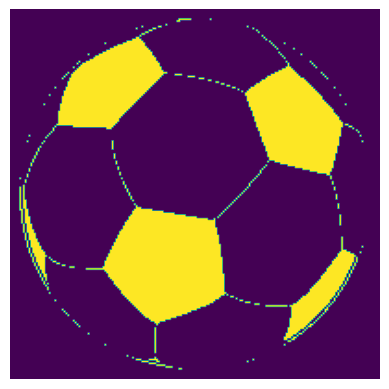

In [2]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
fn_ball = path + 'ball_200.npy'
ball_200 = np.load(fn_ball)
fmriu.plotImage(ball_200,200,0)

In [3]:
import pandas as pd
fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)
P,Q,R = [],[],[]
SNR,CNR,Ji = [],[],[]
K,Eta = [],[]
for p in range(4):
    for q in range(4):
        for r in range(2):
            P.append(p)
            Q.append(q)
            R.append(r+1)
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            K.append(k)
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            fn_eta = path + 'eta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            eta = np.load(fn_eta)
            Eta.append(eta[k-1])
            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNR.append(np.mean(SNRs))
            CNR.append(np.mean(CNRs))
df = pd.DataFrame({'p':P,'q':Q,'r':R,'snr':SNR,'cnr':CNR,'k':K,'eta':Eta,'Ji':Ji})
df

p  q  r        snr       cnr  k       eta        Ji
0   0  0  1  22.561640  6.536976  9  0.755601  0.924161
1   0  0  2  22.570352  6.534188  9  0.755640  0.924385
2   0  1  1  20.315085  6.098048  8  0.758503  0.908458
3   0  1  2  20.318377  6.095958  6  0.763196  0.910301
4   0  2  1  19.729042  5.968286  8  0.757234  0.903890
5   0  2  2  19.725444  5.968164  9  0.754484  0.896098
6   0  3  1  19.711083  5.970449  7  0.762700  0.897665
7   0  3  2  19.685064  5.958463  7  0.760647  0.897794
8   1  0  1  19.861312  5.992360  7  0.762670  0.891552
9   1  0  2  19.847360  5.992120  6  0.766109  0.897003
10  1  1  1  15.168488  5.037599  3  0.776659  0.885277
11  1  1  2  15.165092  5.045429  6  0.764219  0.888274
12  1  2  1  13.800038  4.748897  7  0.765085  0.878605
13  1  2  2  13.812068  4.753256  5  0.767758  0.886233
14  1  3  1  13.580313  4.699308  5  0.767360  0.884363
15  1  3  2  13.582155  4.690824  7  0.762849  0.881055
16  2  0  1  16.269591  5.236279  3  0.775115  0.892629
17  2  0  2  16.255688  5.225876  6  0.765109  0.894077
18  2  1  1  11.860236  4.292119  5  0.767539  0.890808
19  2  1  2  11.861565  4.293326  9  0.754799  0.885288
20  2  2  1  10.285462  3.948000  9  0.756038  0.890922
21  2  2  2  10.302179  3.957717  9  0.753548  0.886254
22  2  3  1   9.918757  3.879586  8  0.757872  0.891363
23  2  3  2   9.920764  3.872169  3  0.777529  0.882036
24  3  0  1  14.189861  4.747954  7  0.763118  0.891220
25  3  0  2  14.187639  4.751054  8  0.759536  0.896075
26  3  1  1  10.153487  3.878821  9  0.754233  0.892718
27  3  1  2  10.145650  3.879115  9  0.757868  0.892068
28  3  2  1   8.724795  3.560381  5  0.766705  0.894512
29  3  2  2   8.722333  3.562893  7  0.760093  0.896584
30  3  3  1   8.381090  3.481951  8  0.759694  0.891087
31  3  3  2   8.369364  3.474585  3  0.776694  0.891589

In [4]:
fn_save = path + 'summaryFixed.csv'
df.to_csv(fn_save,index=False)

## Run 101723

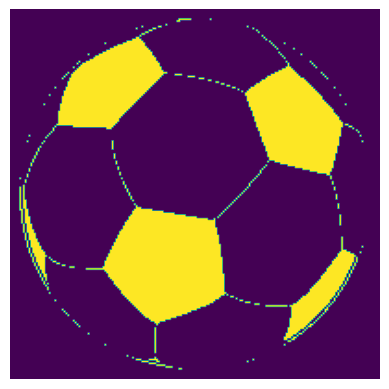

In [10]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
path = 'Data/Simulations/Run101723/'
fn_ball = path + 'ball_200.npy'
ball_200 = np.load(fn_ball)
fmriu.plotImage(ball_200,200,0)

In [33]:
import pandas as pd
fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)
P,Q,R = [],[],[]
V, Val, Lab = [], [], []
#SNR,CNR,Ji = [],[],[]
#K,Eta = [],[]
for p in range(4): #4
    for q in range(4): #4
        for r in range(1): #2
            #P.append(p)
            #Q.append(q)
            #R.append(r+1)
            #fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            #zeta = np.load(fn_zeta)
            #k = len(zeta) - 1
            #K.append(k)
            #Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            #fn_eta = path + 'eta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            #eta = np.load(fn_eta)
            #Eta.append(eta[k-1])
            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            #SNRs = []
            #CNRs = []
            print(p,q,r+1)
            for c in boldpqr.columns:
                P.append(p)
                Q.append(q)
                R.append(r+1)
                V.append(int(c)+1)
                Val.append(fmriu.SNR(boldpqr[c],bold[c]))
                Lab.append('SNR')
                #V.append(int(c)+1)
                #SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                #CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
                P.append(p)
                Q.append(q)
                R.append(r+1)
                V.append(int(c)+1)
                Val.append(fmriu.CNR(boldpqr[c],bold[c]))
                Lab.append('CNR')
            #SNR.append(np.mean(SNRs))
            #CNR.append(np.mean(CNRs))
#df = pd.DataFrame({'p':P,'q':Q,'r':R,'snr':SNR,'cnr':CNR,'k':K,'eta':Eta,'Ji':Ji})
df = pd.DataFrame({'P':P,'Q':Q,'r':R,'v':V,'Value':Val,'Legend':Lab})
df

0 0 1
0 1 1
0 2 1
0 3 1
1 0 1
1 1 1
1 2 1
1 3 1
2 0 1
2 1 1
2 2 1
2 3 1
3 0 1
3 1 1
3 2 1
3 3 1


P  Q  r      v     Value Legend
0        0  0  1      1  4.002471    SNR
1        0  0  1      1  2.633707    CNR
2        0  0  1      2  4.106892    SNR
3        0  0  1      2  2.180211    CNR
4        0  0  1      3  4.259625    SNR
...     .. .. ..    ...       ...    ...
1279995  3  3  1  39998  1.630552    CNR
1279996  3  3  1  39999  3.311186    SNR
1279997  3  3  1  39999  2.595668    CNR
1279998  3  3  1  40000  0.759758    SNR
1279999  3  3  1  40000  1.669670    CNR

[1280000 rows x 6 columns]

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


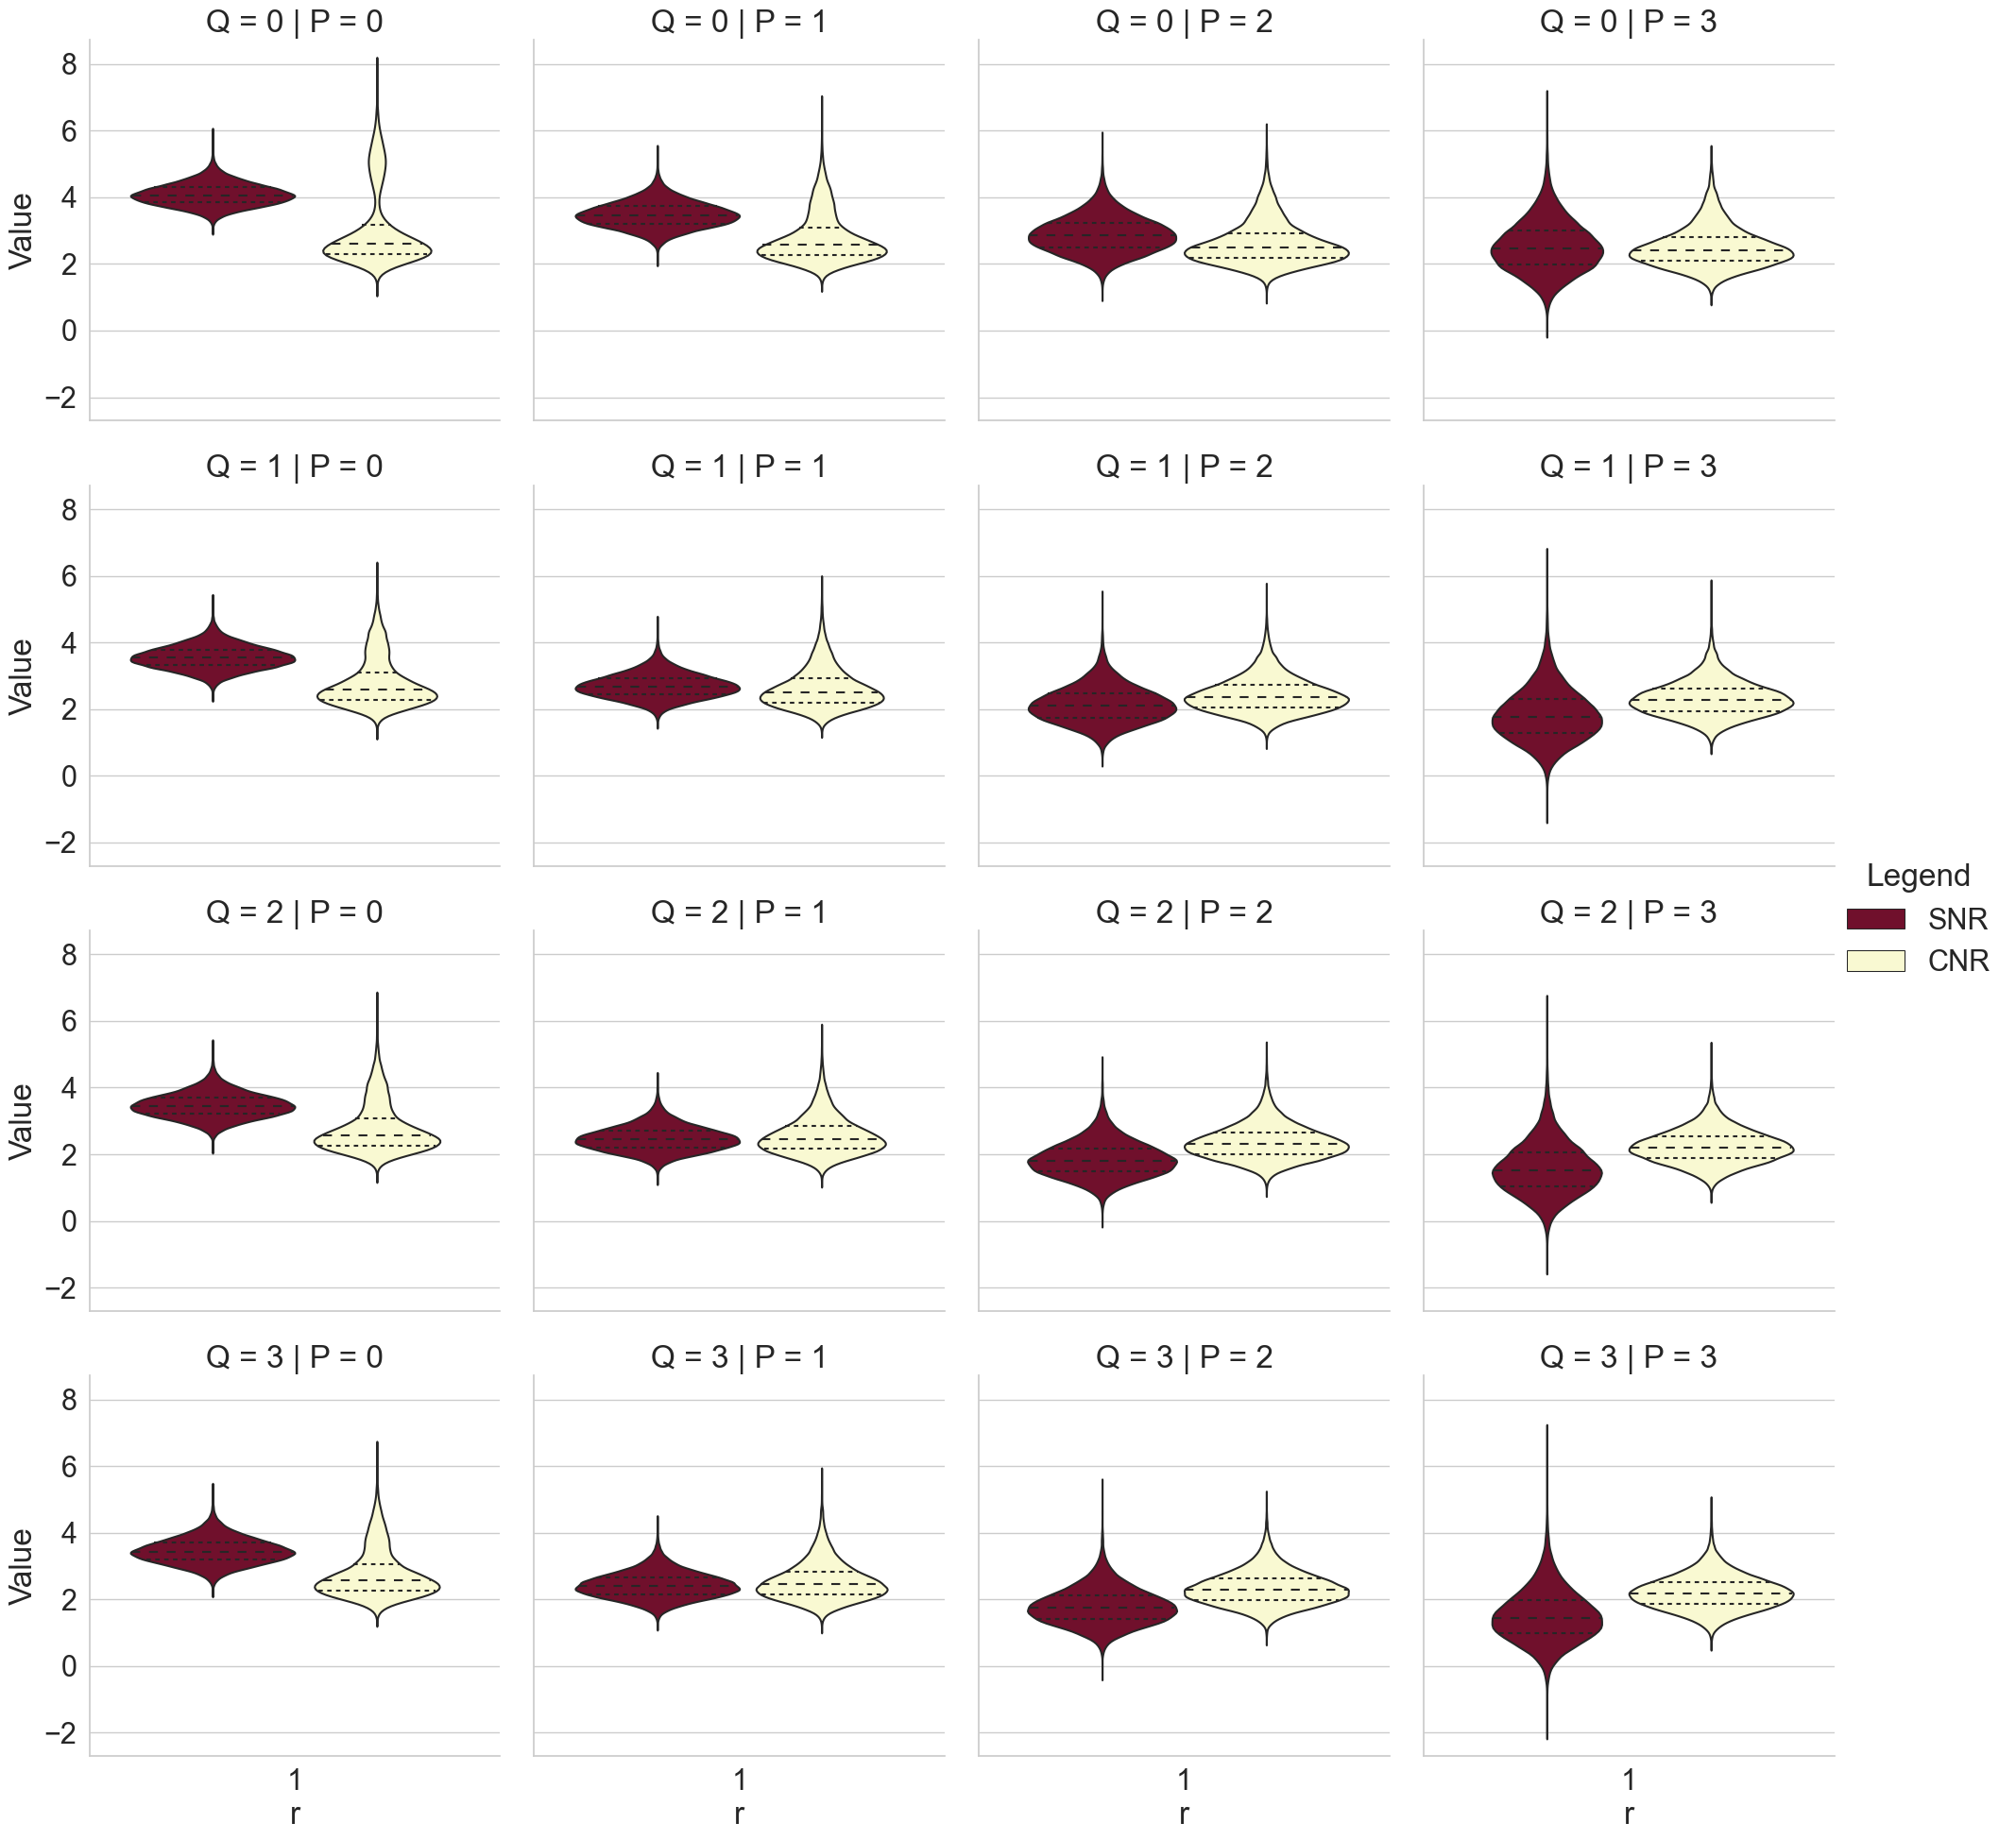

In [46]:
import seaborn as sns
#sns.set_theme(style="whitegrid", palette=None)
sns.set(font_scale=2,style="whitegrid")
sns.catplot(x='r',y='Value',hue='Legend',col='P',row='Q',data=df,kind='violin', inner = 'quartile',palette=['#800026','#ffffcc'])
plt.show()

In [7]:
import pandas as pd
fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)
P,Q,R = [],[],[]
SNR,CNR,Ji = [],[],[]
K,Eta = [],[]
for p in range(4):
    for q in range(4):
        for r in range(2):
            P.append(p)
            Q.append(q)
            R.append(r+1)
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            K.append(k)
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            fn_eta = path + 'eta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            eta = np.load(fn_eta)
            Eta.append(eta[k-1])
            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNR.append(np.mean(SNRs))
            CNR.append(np.mean(CNRs))
df = pd.DataFrame({'p':P,'q':Q,'r':R,'snr':SNR,'cnr':CNR,'k':K,'eta':Eta,'Ji':Ji})
df

p  q  r       snr       cnr  k       eta        Ji
0   0  0  1  4.085835  3.032654  9  0.755959  0.926220
1   0  0  2  4.087525  3.033459  7  0.760763  0.924496
2   0  1  1  3.559872  2.791602  7  0.761873  0.906134
3   0  1  2  3.561359  2.786336  8  0.758272  0.907047
4   0  2  1  3.469135  2.768712  5  0.767890  0.904745
5   0  2  2  3.462651  2.765707  8  0.757347  0.904255
6   0  3  1  3.458250  2.763609  7  0.761444  0.897202
7   0  3  2  3.458812  2.764318  8  0.753660  0.900167
8   1  0  1  3.484566  2.765244  7  0.757173  0.895352
9   1  0  2  3.486012  2.767082  7  0.756714  0.901853
10  1  1  1  2.700482  2.625247  7  0.744087  0.881758
11  1  1  2  2.699221  2.622319  9  0.740607  0.876639
12  1  2  1  2.471607  2.562002  9  0.731497  0.876214
13  1  2  2  2.470604  2.560261  8  0.731664  0.869002
14  1  3  1  2.430338  2.546824  7  0.736421  0.863621
15  1  3  2  2.428391  2.549528  7  0.736005  0.871337
16  2  0  1  2.886084  2.613675  7  0.753928  0.891566
17  2  0  2  2.888638  2.616272  9  0.743914  0.895051
18  2  1  1  2.131797  2.429515  8  0.725762  0.878023
19  2  1  2  2.127889  2.437060  8  0.728024  0.876929
20  2  2  1  1.853396  2.363015  9  0.707789  0.866111
21  2  2  2  1.857370  2.360343  9  0.709773  0.864333
22  2  3  1  1.791628  2.337807  7  0.709388  0.859421
23  2  3  2  1.787963  2.336414  9  0.705628  0.866612
24  3  0  1  2.528775  2.499327  7  0.751312  0.902097
25  3  0  2  2.531849  2.494937  7  0.749630  0.902233
26  3  1  1  1.827913  2.313463  8  0.720108  0.886029
27  3  1  2  1.830753  2.314885  7  0.725508  0.882641
28  3  2  1  1.574224  2.238871  8  0.703780  0.878075
29  3  2  2  1.576228  2.237382  8  0.702882  0.876719
30  3  3  1  1.512931  2.212004  7  0.703804  0.873392
31  3  3  2  1.513515  2.213044  8  0.699565  0.871328

In [8]:
fn_save = path + 'summary.csv'
df.to_csv(fn_save,index=False)

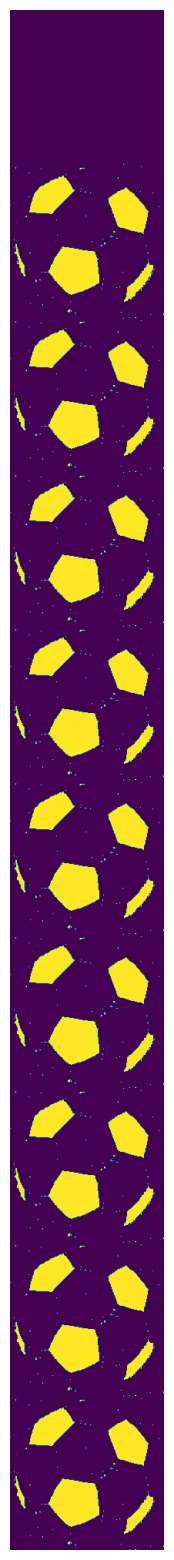

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
path = 'Data/Simulations/Run101723/'
fn_zeta = path + 'Zeta_P0Q0R1.npy'
plt.figure(figsize=(2,20))
zeta = np.load(fn_zeta)
fmriu.plotImage(zeta,200,0)
plt.savefig('aMaps.png', bbox_inches='tight')


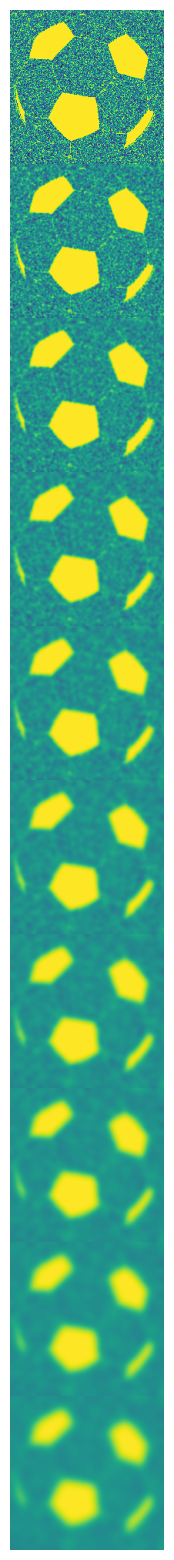

In [10]:
path = 'Data/Simulations/Run101723/'
fn_X = path + 'X_P0Q0R1.npy'
X = np.load(fn_X)
plt.figure(figsize=(2,20))
fmriu.plotImage(X,200,0)

## Summary

In [9]:
import pandas as pd
df1 = pd.read_csv('Data/Simulations/Run092623/summaryFixed.csv')
df2 = pd.read_csv('Data/Simulations/Run101723/summary.csv')

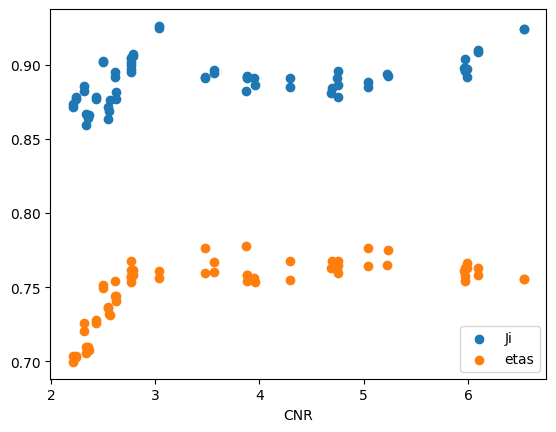

In [40]:
import matplotlib.pyplot as plt
cnrs = list(df2['cnr'].values)+list(df1['cnr'].values)
jis = list(df2['Ji'].values)+list(df1['Ji'].values)
etas = list(df2['eta'].values)+list(df1['eta'].values)

#color = np.array(cnrs)/max(cnrs)

plt.scatter(cnrs,jis,label='Ji')
plt.scatter(cnrs,etas,label='etas')
plt.xlabel('CNR')
plt.legend()
#plt.ylabel('Ji')

Text(0, 0.5, 'k')

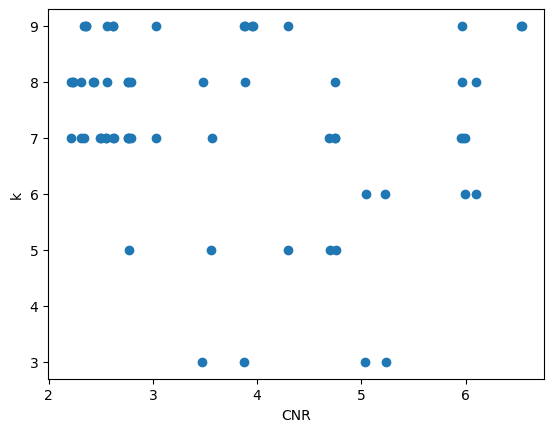

In [41]:
import matplotlib.pyplot as plt
cnrs = list(df2['cnr'].values)+list(df1['cnr'].values)
ks = list(df2['k'].values)+list(df1['k'].values)

plt.scatter(cnrs,ks)
plt.xlabel('CNR')
#plt.legend()
plt.ylabel('k')

p  q  r        snr       cnr  k       eta        Ji
0   0  0  1  22.561640  6.536976  9  0.755601  0.924161
1   0  0  2  22.570352  6.534188  9  0.755640  0.924385
2   0  1  1  20.315085  6.098048  8  0.758503  0.908458
3   0  1  2  20.318377  6.095958  6  0.763196  0.910301
4   0  2  1  19.729042  5.968286  8  0.757234  0.903890
5   0  2  2  19.725444  5.968164  9  0.754484  0.896098
6   0  3  1  19.711083  5.970449  7  0.762700  0.897665
7   0  3  2  19.685064  5.958463  7  0.760647  0.897794
8   1  0  1  19.861312  5.992360  7  0.762670  0.891552
9   1  0  2  19.847360  5.992120  6  0.766109  0.897003
10  1  1  1  15.168488  5.037599  3  0.776659  0.885277
11  1  1  2  15.165092  5.045429  6  0.764219  0.888274
12  1  2  1  13.800038  4.748897  7  0.765085  0.878605
13  1  2  2  13.812068  4.753256  5  0.767758  0.886233
14  1  3  1  13.580313  4.699308  5  0.767360  0.884363
15  1  3  2  13.582155  4.690824  7  0.762849  0.881055
16  2  0  1  16.269591  5.236279  3  0.775115  0.892629
17  2  0  2  16.255688  5.225876  6  0.765109  0.894077
18  2  1  1  11.860236  4.292119  5  0.767539  0.890808
19  2  1  2  11.861565  4.293326  9  0.754799  0.885288
20  2  2  1  10.285462  3.948000  9  0.756038  0.890922
21  2  2  2  10.302179  3.957717  9  0.753548  0.886254
22  2  3  1   9.918757  3.879586  8  0.757872  0.891363
23  2  3  2   9.920764  3.872169  3  0.777529  0.882036
24  3  0  1  14.189861  4.747954  7  0.763118  0.891220
25  3  0  2  14.187639  4.751054  8  0.759536  0.896075
26  3  1  1  10.153487  3.878821  9  0.754233  0.892718
27  3  1  2  10.145650  3.879115  9  0.757868  0.892068
28  3  2  1   8.724795  3.560381  5  0.766705  0.894512
29  3  2  2   8.722333  3.562893  7  0.760093  0.896584
30  3  3  1   8.381090  3.481951  8  0.759694  0.891087
31  3  3  2   8.369364  3.474585  3  0.776694  0.891589

# Other things

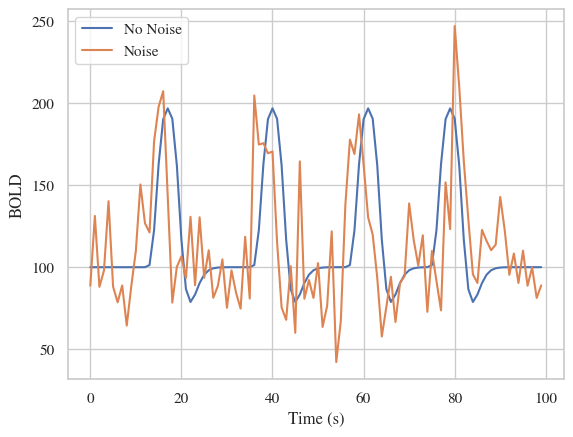

In [50]:
BOLDnew = pd.read_csv('BOLD_P0Q0R1.csv')
BOLD = pd.read_csv('Data/Simulations/Run032724/2D/BOLD.csv')

import matplotlib.pyplot as plt
BOLD['5046'].plot()
BOLDnew['5046'].plot()
plt.legend(['No Noise','Noise'])
plt.ylabel('BOLD')
plt.xlabel('Time (s)')
plt.show()

<Axes: >

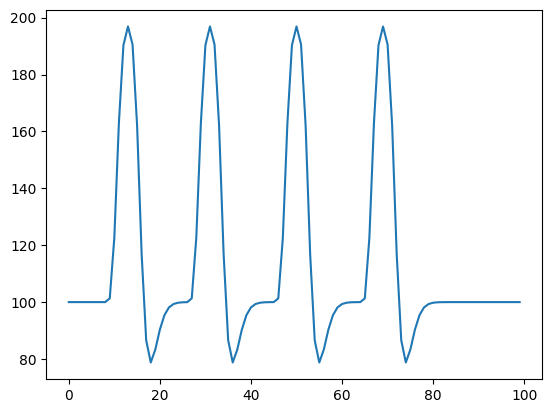

In [23]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA
bold['25500'].plot()

In [48]:
import numpy as np
from numba import njit, prange
import time

@njit(parallel=True, fastmath=True)
def mat_mult(A, B):
    assert A.shape[1] == B.shape[0]
    res = np.zeros((A.shape[0], B.shape[1]), )
    for i in prange(A.shape[0]):
        for k in range(A.shape[1]):
            for j in range(B.shape[1]):
                res[i,j] += A[i,k] * B[k,j]
    return res

In [50]:
m, n, c = 1000, 1500, 1200
A = np.random.randint(1, 50, size = (m, n))
B = np.random.randint(1, 50, size = (n, c))

start1 = time.time()
res1 = mat_mult(A, B)
end1 = time.time()
print('With numba: ',end1-start1, ' seconds')
start2 = time.time()
res2 = A@B
end2 = time.time()
print('With numpy: ',end2-start2, ' seconds')

With numba:  0.40625  seconds
With numpy:  1.6153671741485596  seconds


In [49]:
@njit
def mat_inv(M):
    return(np.linalg.inv(M))

In [51]:
A = np.random.randint(1, 50, size = (m, m)).astype(float)
start1 = time.time()
res1 = mat_inv(A)
end1 = time.time()
print('With numba: ',end1-start1, ' seconds')
start2 = time.time()
res2 = np.linalg.inv(A)
end2 = time.time()
print('With numpy: ',end2-start2, ' seconds')

With numba:  0.09767413139343262  seconds
With numpy:  0.2915189266204834  seconds


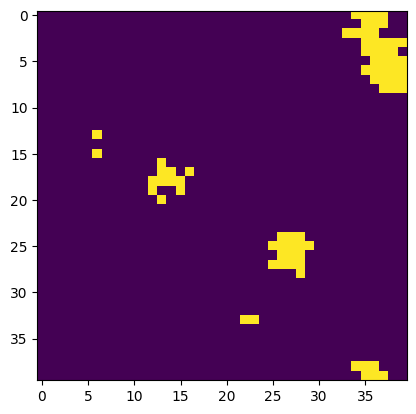

In [10]:
import numpy as np
import matplotlib.pyplot as plt
im = np.load('Data/ImagesCreated/image_40x40x25_0.npy')
plt.imshow(im[:,:,5])

In [11]:
sum(sum(sum(im)))/40000

0.032225

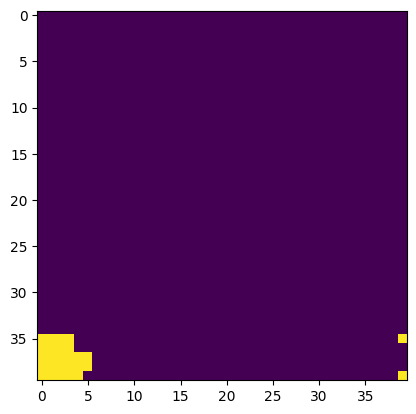

In [22]:
import numpy as np
import matplotlib.pyplot as plt
im = np.load('Data/ImagesCreated/image_40x40x25_1.npy')
plt.imshow(im[:,:,6])

In [28]:
sum(sum(sum(im)))/40000

0.039525

In [56]:
im.flatten()

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
import pandas as pd
BOLDn = pd.read_csv('Data/Simulations/BOLD_P0Q0R1.csv')
BOLDn

0           1           2           3           4           5  \
0   107.977951   72.285243   72.854876   91.955677   82.990485   80.254456   
1    83.438653   71.924424  180.755835  102.944711  106.020633   95.214453   
2   104.806315   65.962184   66.392417  116.952575   87.835636   96.464653   
3    92.863865  120.523617   86.618204  123.589101   89.288055  135.630824   
4   109.512712   49.133465  114.103636  115.507883   98.326065   85.130375   
..         ...         ...         ...         ...         ...         ...   
95  100.166388   84.936807   79.003750  154.271295   88.707249  113.121503   
96  128.239909  128.368802   86.712455  131.231391  114.261531   84.838803   
97   79.301820   62.229666   82.462952   81.365977   82.882048  152.581417   
98  127.663937  111.615440  127.996553  147.814768  118.653025   98.914001   
99   95.719002   87.433043   98.498692  136.586470  104.128713  101.230690   

             6           7           8           9  ...       39990  \
0    74.380490  100.868433  145.541571   98.626257  ...  135.983764   
1    77.509471   81.276018  127.712041  108.315091  ...   79.533865   
2    94.226467  136.778179  145.823530   70.957504  ...   84.212492   
3    66.371518   88.984709  109.109585   91.237015  ...   92.973033   
4   145.554664  124.601560   89.763014   84.769579  ...   88.460731   
..         ...         ...         ...         ...  ...         ...   
95   95.840484  126.117476  117.020847  101.997749  ...   99.191446   
96  100.806357  100.587708  109.095719  127.288066  ...   98.526517   
97  120.663958   76.234805   71.775804   96.667086  ...  156.923005   
98  105.529370  116.420213  115.243282  121.369897  ...  105.394653   
99   95.395987  124.637200   76.927459   71.690156  ...   78.263635   

         39991       39992       39993       39994       39995       39996  \
0    85.656858   87.041066   85.953127   65.994515   73.045219  110.974724   
1    95.990317   91.122070   77.885773   51.639850   85.868176  138.504739   
2   113.140185   75.821231   97.187534  104.345095   67.511512   99.663891   
3   117.060029  120.366339  106.896507  122.877627   93.984695   80.735965   
4   113.943831   77.228681  105.594423  105.535024   82.731338  100.754233   
..         ...         ...         ...         ...         ...         ...   
95   85.450883  151.053089   82.056045   94.222746   65.075274   97.948277   
96  108.246259  146.607795   91.905332   79.322063   90.037571  110.205395   
97   53.561498   87.142448   64.542959  129.412895   78.340835   85.368351   
98   95.732295   91.196357  103.065532  151.935953  108.679427  126.104490   
99  120.576561   60.682460   89.176571   67.258877  127.565207   81.105792   

         39997       39998       39999  
0   139.502203  113.107350  121.389446  
1    46.896336   89.860243   66.891118  
2   117.884295  109.651760  139.585357  
3    72.873113  129.051326   80.875087  
4    78.766957  100.767961  125.551345  
..         ...         ...         ...  
95   69.267573  146.520088   72.784496  
96  101.426526  115.564208   83.926756  
97  134.119669  115.885711  103.380074  
98   95.292216  115.851432   95.767359  
99  180.053387   88.265301  136.975713  

[100 rows x 40000 columns]

<Axes: >

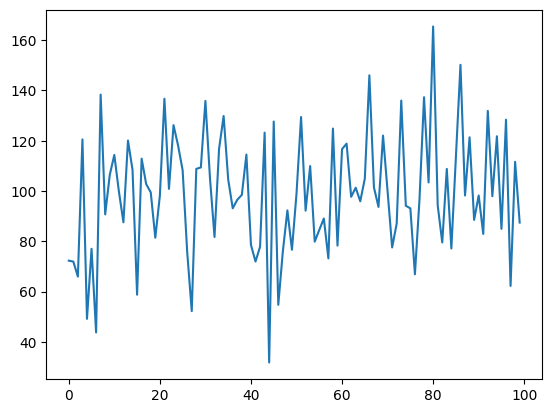

In [61]:
BOLDn['1'].plot()

## Foto baby

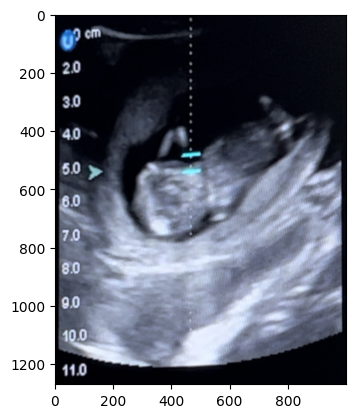

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('Data/socrates.jpg')
numpydata = np.asarray(image)

plt.imshow(numpydata)



In [14]:
s = numpydata.shape
s

(1270, 999, 3)

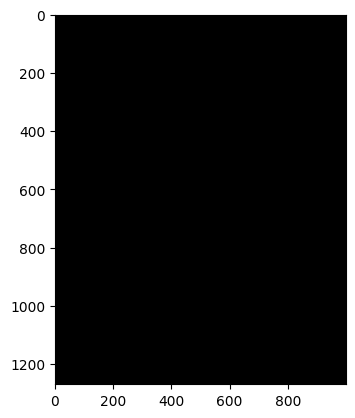

In [60]:
new = np.full((1270,999,3),np.array([0,0,0]))
plt.imshow(new)

In [61]:
for i in range(s[0]):
    for j in range(s[1]):
        if (i > 300) and (i<=350) and (j>650) and (j<=700):
            new[i,j,:] = new2[i-301,j-651,:]
        else:
            new[i,j,:] = numpydata[i,j,:]

(-0.5, 998.5, 1269.5, -0.5)

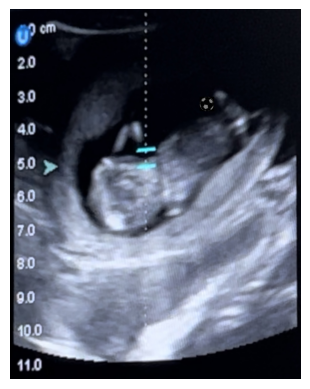

In [64]:
plt.imshow(new)
plt.axis('off')

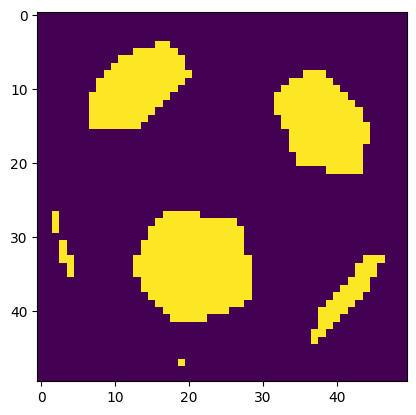

In [29]:
plt.imshow(np.reshape(np.load('Data/ball_50.npy'),(-1,50)))

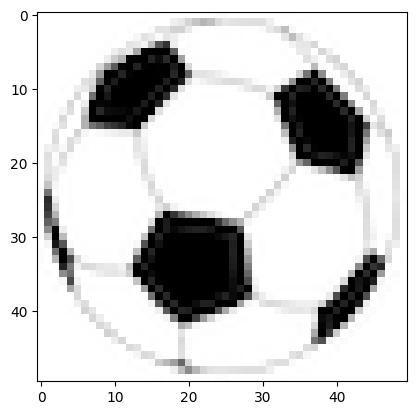

In [30]:
image2 = Image.open('Data/Simulations/ball_50.png')
numpydata2 = np.asarray(image2)

plt.imshow(numpydata2)

In [33]:
numpydata2[20,48,:]

array([185, 185, 185, 116], dtype=uint8)

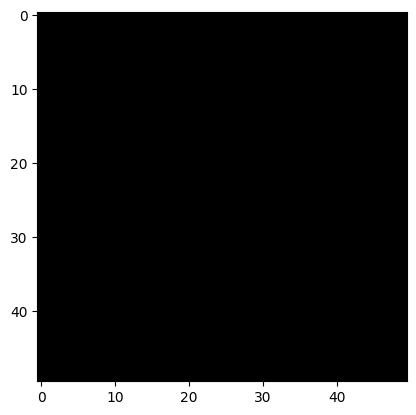

In [51]:
new2 = np.full((50,50,3),np.array([0,0,0]))
plt.imshow(new2)

In [52]:
for i in range(50):
    for j in range(50):
        rgbt = numpydata2[i,j,:]
        r,g,b,t = 255-rgbt[0],255-rgbt[1],255-rgbt[2],rgbt[3]
        if t > 10:
            new2[i,j,:] = np.array([r/2,g/2,b/2])
        else:
            new2[i,j,:] = np.array([0,0,0])

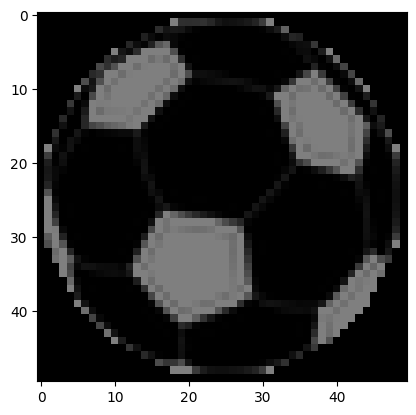

In [53]:
plt.imshow(new2)

In [15]:
import random
import numpy as np
(np.random.random((40,40))>0.99).astype(int)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])